# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
#from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
#YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3



In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price

response_btc_data = requests.get(btc_url).json()
current_btc_price = response_btc_data["data"]["1"]["quotes"]["CAD"]["price"] 

# Fetch current ETH price

response_eth_data = requests.get(eth_url).json()
current_eth_price = response_eth_data["data"]["1027"]["quotes"]["CAD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63901.30
The current value of your 5.3 ETH is $19995.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv("ALPACA_API_KEY")
api_key_bis = os.getenv("ALPACA_SECRET_KEY")


#clear key and clear display function but leave os.get
# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_key_bis,
    api_version = 'v2'
)

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-20", tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_current_price = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    limit = 1000
).df

# Preview DataFrame
df_current_price.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-21 04:00:00+00:00,107.60,107.649,106.9841,107.04,7583668,27316,107.310151,AGG
2022-03-21 04:00:00+00:00,444.45,446.460,440.6800,444.39,85377983,912432,443.796432,SPY


In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_current_price['close'][0]
spy_close_price = df_current_price['close'][1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.39


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22219.50
The current value of your 200 AGG shares is $21408.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,83896.551856
shares,43627.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

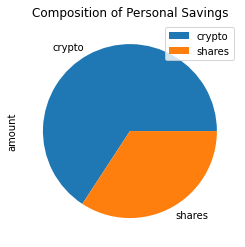

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Composition of Personal Savings')

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print()
else:
    print(f'You are ${(emergency_fund - total_savings):0.2f} away...')

Congratulations, you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-20', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_agg = alpaca.get_bars(
    "AGG",
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

df_spy = alpaca.get_bars(
    "SPY",
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

df_combined = pd.concat([df_agg, df_spy], axis=1, keys=["AGG","SPY"])

# Display sample data
df_combined.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-20 04:00:00+00:00  107.86  108.05  107.8401  108.05  1635249   
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-03-20 04:00:00+00:00        8198  107.961544  237.03  237.36  236.32   
2017-03-21 04:00:00+00:00       12024  108.175725  237.49  237.61  233.58   
2017-03-22 04:00:00+00:00       11111  108.455049  233.78  234.61  233.05   
2017-03-23 04:00:00+00:00       10901  108.417635  234.01  235.34  233.60   
2017-03-24 04:00:00+00:00       11229  108.398485  234.35  235.04  232.96   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-03-20 04:00:00+00:00  236.74   52536979      169612  236.909398  
2017-03-21 04:00:00+00:00  233.76  131809275      443599  234.853857  
2017-03-22 04:00:00+00:00  234.25   97569204      307469  233.932509  
2017-03-23 04:00:00+00:00  233.94  100410277      333903  234.388790  
2017-03-24 04:00:00+00:00  233.88  112504853      359600  234.080978

In [18]:
MC_five_year = MCSimulation(
    portfolio_data = df_combined,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_combined,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [20]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-20 04:00:00+00:00  107.86  108.05  107.8401  108.05  1635249   
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-20 04:00:00+00:00        8198  107.961544          NaN  237.03   
2017-03-21 04:00:00+00:00       12024  108.175725     0.002036  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    -0.000830  234.35   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-03-20 04:00:00+00:00  237.36  236.32  236.74   52536979      169612   
2017-03-21 04:00:00+00:00  237.61  233.58  233.76  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.25   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.94  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.88  112504853      359600   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-20 04:00:00+00:00  236.909398          NaN  
2017-03-21 04:00:00+00:00  234.853857    -0.012588  
2017-03-22 04:00:00+00:00  233.932509     0.002096  
2017-03-23 04:00:00+00:00  234.388790    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    -0.000256

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Abdul\Documents\projects\MONU-VIRT-FIN-PT-02-2022-U-LOL\Unit 5 - APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990582,0.990319,0.991343,1.005266,1.014381,1.009072,1.003856,0.996279,0.993018,0.996800,...,1.011449,0.989895,0.999892,1.003606,1.003450,1.003915,1.007327,0.990248,0.993132,1.001919
2,0.997764,0.988850,0.995683,0.994968,1.011294,1.005340,0.997542,1.003287,0.991011,1.004621,...,1.005652,0.989961,1.003747,0.995342,1.000930,0.997783,1.010926,0.981066,0.991439,1.002998
3,1.004853,0.998680,0.986447,0.991485,1.010651,1.010999,0.999634,1.014875,0.999999,1.001405,...,0.992716,0.991111,1.004202,0.995808,0.994997,0.992078,1.006906,0.978052,0.981209,1.003334
4,1.016041,0.997602,0.983402,1.001188,1.006044,0.991652,1.008605,1.040529,0.997863,0.995163,...,0.993102,0.986464,0.990988,0.997084,0.999365,0.998757,0.994996,0.970246,0.978203,1.015977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.490259,6.435756,11.931430,6.036221,6.523891,16.082621,11.730953,3.356159,11.947028,14.229500,...,18.089131,29.993625,12.521575,25.781974,30.797770,18.667630,55.932299,15.480192,18.432055,27.183856
7557,20.520130,6.509122,12.054945,6.051581,6.530365,16.221276,11.843208,3.398285,11.824062,14.383997,...,17.994318,29.527985,12.697561,25.574255,30.933966,18.616739,55.400771,15.366156,18.360252,27.044919
7558,20.514625,6.448781,12.203276,6.111767,6.472453,16.424294,11.830372,3.386933,11.796660,14.632267,...,17.998617,29.500192,12.850431,25.646277,31.072095,18.520759,55.259719,15.363377,18.616185,27.227616
7559,20.443514,6.444718,12.323791,6.143629,6.562546,16.410588,11.926659,3.381878,11.900979,14.721911,...,18.043883,29.651480,12.963638,25.874295,30.773528,18.351763,54.953855,15.649139,18.555653,27.421844


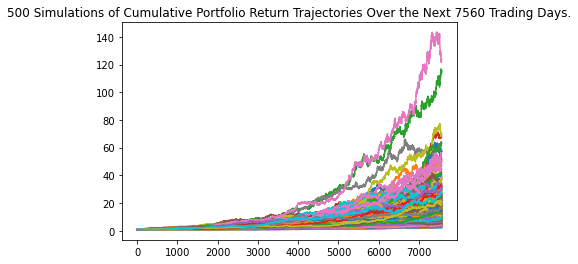

In [23]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

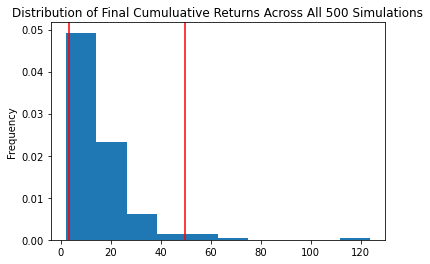

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_30 = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(summary_30)

count           500.000000
mean             15.250492
std              12.548596
min               2.020432
25%               7.665640
50%              12.138411
75%              18.859622
max             123.844539
95% CI Lower      3.246703
95% CI Upper     49.680004
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_30[8] * initial_investment,2)
ci_upper = round(summary_30[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64934.05 and $993600.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_five_year = MCSimulation(
    portfolio_data = df_combined,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)      

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Abdul\Documents\projects\MONU-VIRT-FIN-PT-02-2022-U-LOL\Unit 5 - APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009226,0.999317,0.994295,1.002806,0.999947,1.003694,1.006912,1.008971,1.005757,0.996830,...,1.017734,0.994545,0.998277,0.999553,1.004721,1.017695,1.000644,0.994334,0.995002,1.008786
2,1.012963,0.994288,1.011613,0.989050,1.007667,1.002171,1.015129,0.988065,1.001769,0.988154,...,1.032097,0.990191,0.991046,1.003130,1.000429,1.023390,0.999870,0.988449,0.996902,1.007358
3,1.001953,0.994773,1.002372,0.989373,1.028029,1.007657,0.997870,0.988226,0.995966,0.986746,...,1.021534,0.985950,0.997326,1.004088,1.004740,1.019114,1.005297,0.989749,0.997065,0.994579
4,0.999813,0.987566,1.012408,0.991104,1.027570,1.012033,0.991339,0.989017,0.992508,0.982673,...,1.018168,0.975445,0.985446,1.014626,0.994627,1.008111,1.013924,0.990568,0.987373,0.998142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.740132,1.487807,2.832353,2.177924,1.018059,1.572017,1.249833,2.033609,1.585516,1.089252,...,1.671278,1.284798,1.498390,1.303276,1.369535,1.379480,1.549535,1.249103,1.860743,2.033725
1257,1.729650,1.480130,2.841681,2.183170,1.018647,1.607378,1.248861,2.030775,1.599385,1.092486,...,1.679041,1.288466,1.479570,1.302611,1.358349,1.371479,1.565591,1.254686,1.871612,2.032976
1258,1.719329,1.480079,2.839184,2.155525,1.024572,1.594023,1.255308,2.050881,1.607285,1.094531,...,1.698280,1.288116,1.490684,1.295968,1.362303,1.373887,1.583786,1.243278,1.871041,2.039722
1259,1.718312,1.473432,2.858185,2.149664,1.022682,1.575888,1.261354,2.050784,1.618429,1.098088,...,1.708577,1.286444,1.491088,1.280231,1.369904,1.378937,1.578265,1.235030,1.854446,2.040960


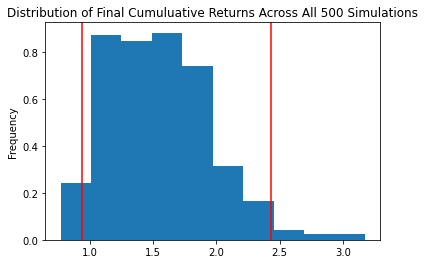

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
dist_plot_two = MC_five_year.plot_distribution()

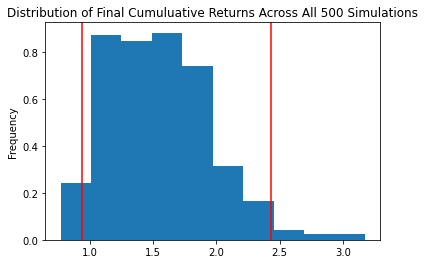

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_two = MC_five_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_5 = MC_five_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_5)

count           500.000000
mean              1.553734
std               0.406932
min               0.767777
25%               1.237992
50%               1.523500
75%               1.805622
max               3.173857
95% CI Lower      0.938226
95% CI Upper      2.431237
Name: 1260, dtype: float64


In [47]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 100000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary_5[8] * initial_investment,2)
ci_upper_five = round(summary_5[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $150000.0 in the portfolio over the next 5 years will end within in the range of $140733.83 and $364685.51


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data = df_combined,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252 * 10 
)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Abdul\Documents\projects\MONU-VIRT-FIN-PT-02-2022-U-LOL\Unit 5 - APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005462,0.989497,1.000759,1.009659,0.997780,1.000845,0.993643,1.017093,1.004807,1.001440,...,1.004337,1.000169,0.989491,0.999288,1.007416,0.999474,1.005824,1.005235,0.992547,0.985278
2,1.020133,0.998047,0.996491,1.009416,1.001685,1.003141,0.996927,1.021001,0.992920,0.992620,...,1.015588,0.987192,0.984724,1.001934,1.006816,1.005583,1.008812,1.010363,1.003558,0.980988
3,1.025098,1.002562,0.999757,1.009499,1.003417,0.992436,0.989142,1.017247,0.994763,0.994669,...,1.017201,0.991243,0.976088,1.009513,1.010431,1.000417,1.013334,0.993686,1.001210,0.975184
4,1.026475,1.005865,0.998137,1.012095,0.997499,0.998256,0.995326,1.028839,0.995041,1.007837,...,1.022503,1.008436,0.974170,1.005297,1.014470,0.994518,1.026169,0.993929,1.005526,0.975362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.121421,2.118091,2.278487,1.531390,3.483776,3.008399,2.288299,3.088459,1.552192,2.033435,...,3.154080,2.987600,1.072753,2.624636,1.946387,4.012700,2.136078,3.449556,1.252661,2.194945
2517,3.123567,2.085873,2.258649,1.528366,3.515219,3.039191,2.268583,3.081017,1.552680,2.028142,...,3.134929,2.996361,1.074092,2.605287,1.966353,4.000420,2.132229,3.426177,1.233018,2.181359
2518,3.130939,2.053436,2.261451,1.518141,3.524507,3.033822,2.265897,3.045525,1.543167,2.053896,...,3.124801,2.980868,1.073261,2.576681,1.968032,3.959591,2.136022,3.451240,1.218012,2.205102
2519,3.091235,2.032998,2.256227,1.528557,3.511331,3.037355,2.300484,3.018067,1.551627,2.059644,...,3.145247,2.982599,1.081391,2.556203,1.977781,3.949256,2.144106,3.455287,1.221298,2.216706


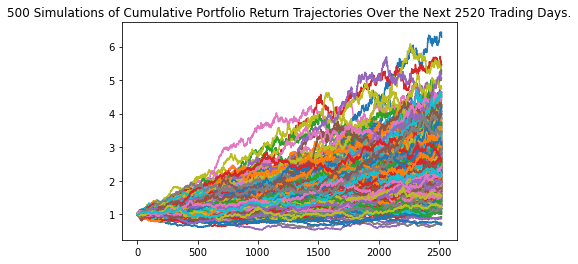

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!
dist_plot_three = MC_ten_year.plot_simulation()

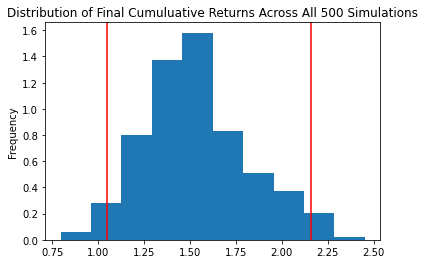

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_three = MC_ten_year.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_10 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary_10)

count           500.000000
mean              2.488799
std               0.895217
min               0.690398
25%               1.814033
50%               2.383532
75%               3.008200
max               6.279619
95% CI Lower      1.139605
95% CI Upper      4.501714
Name: 2520, dtype: float64


In [52]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000*1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_10[8] * initial_investment,2)
ci_upper_ten = round(summary_10[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $90000.0 in the portfolio over the next 10 years will end within in the range of $102564.48 and $405154.24
